In [1]:
import os
import sys
sys.path.append(r"D:\Desktop\processing\src")

from phase1_exploration import DataExploration


In [2]:
from phase2_cleaning import DataCleaning

In [3]:
from phase3_feature_engineering import FeatureEngineering

In [4]:
from phase4_feature_selection import FeatureSelection

In [5]:
from phase5_balancing import DataBalancing

In [6]:
from save_data import save_data

In [7]:
explorer = DataExploration()
cleaner = DataCleaning()
engineer = FeatureEngineering()
selector = FeatureSelection()
balancer = DataBalancing()


In [8]:
data = explorer.load_data('../Diabetes Missing Data.csv')


In [9]:
explorer.explore_data(data)
explorer.identify_issues(data)


--- Dataset Overview ---
   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-n


Missing values per column:
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


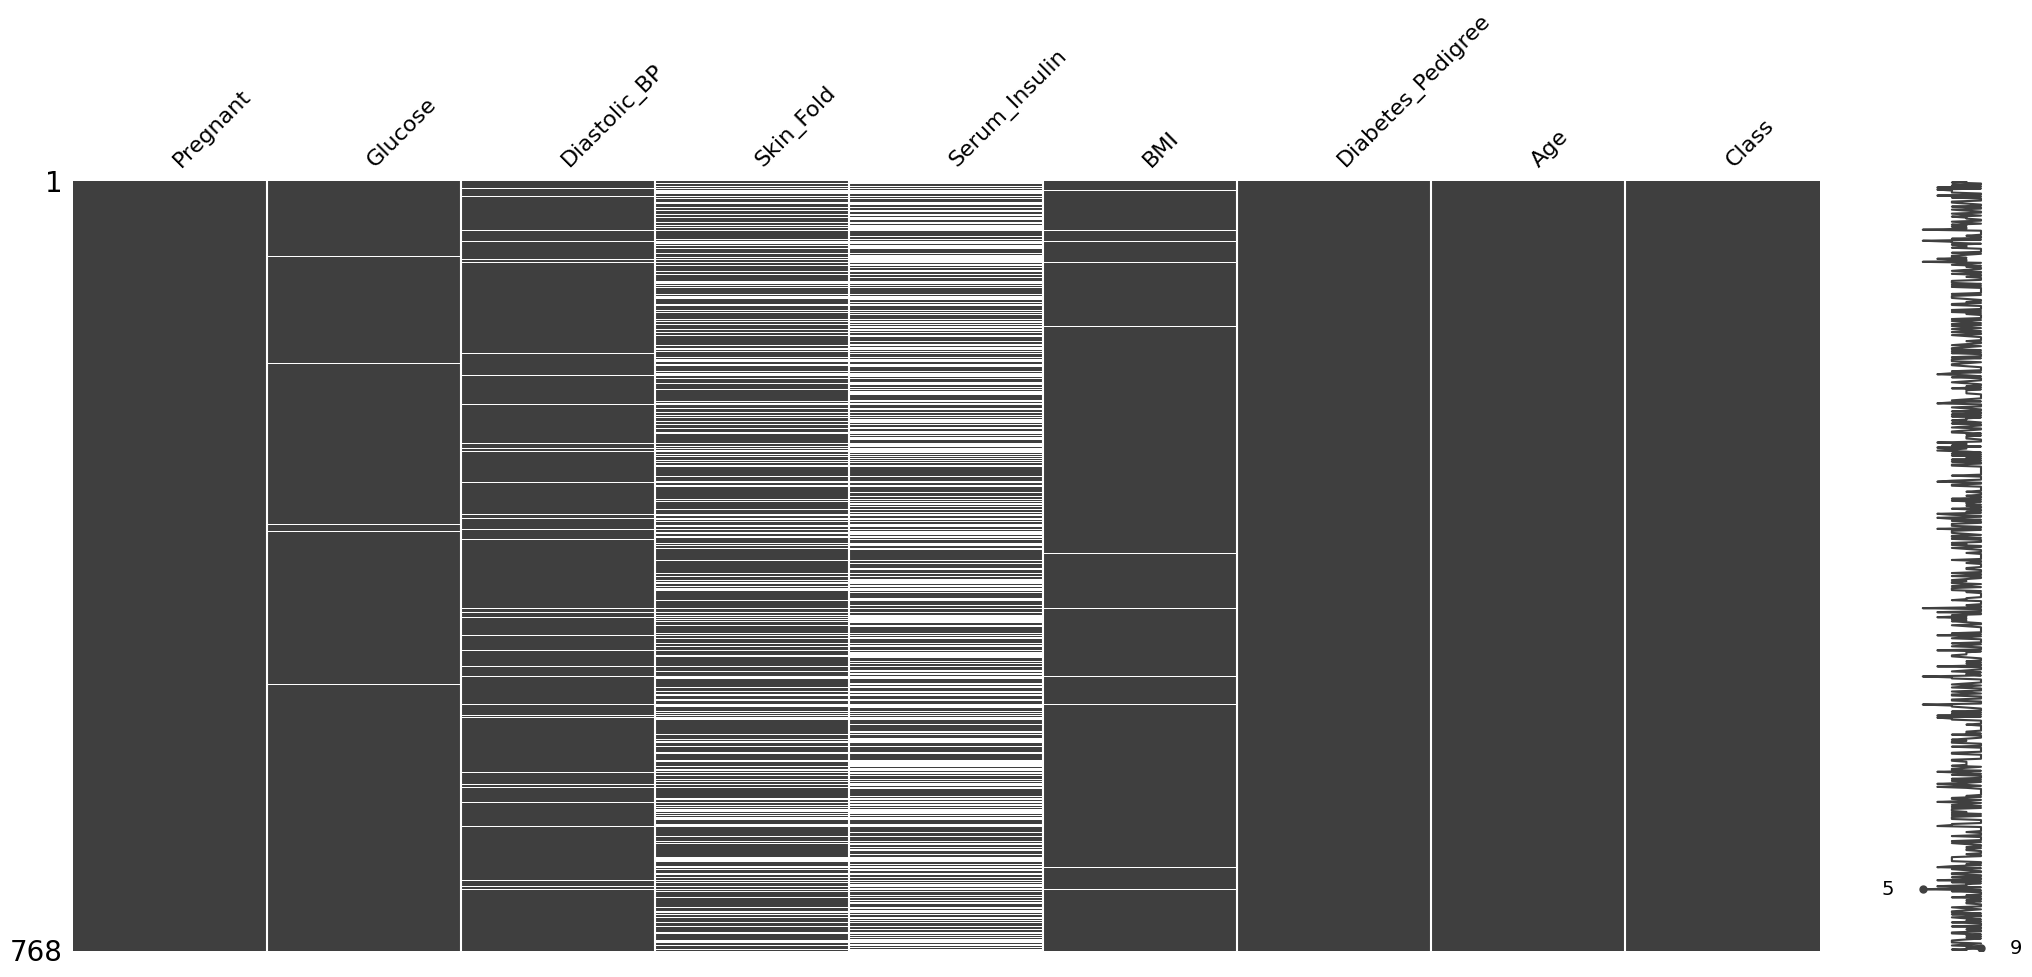

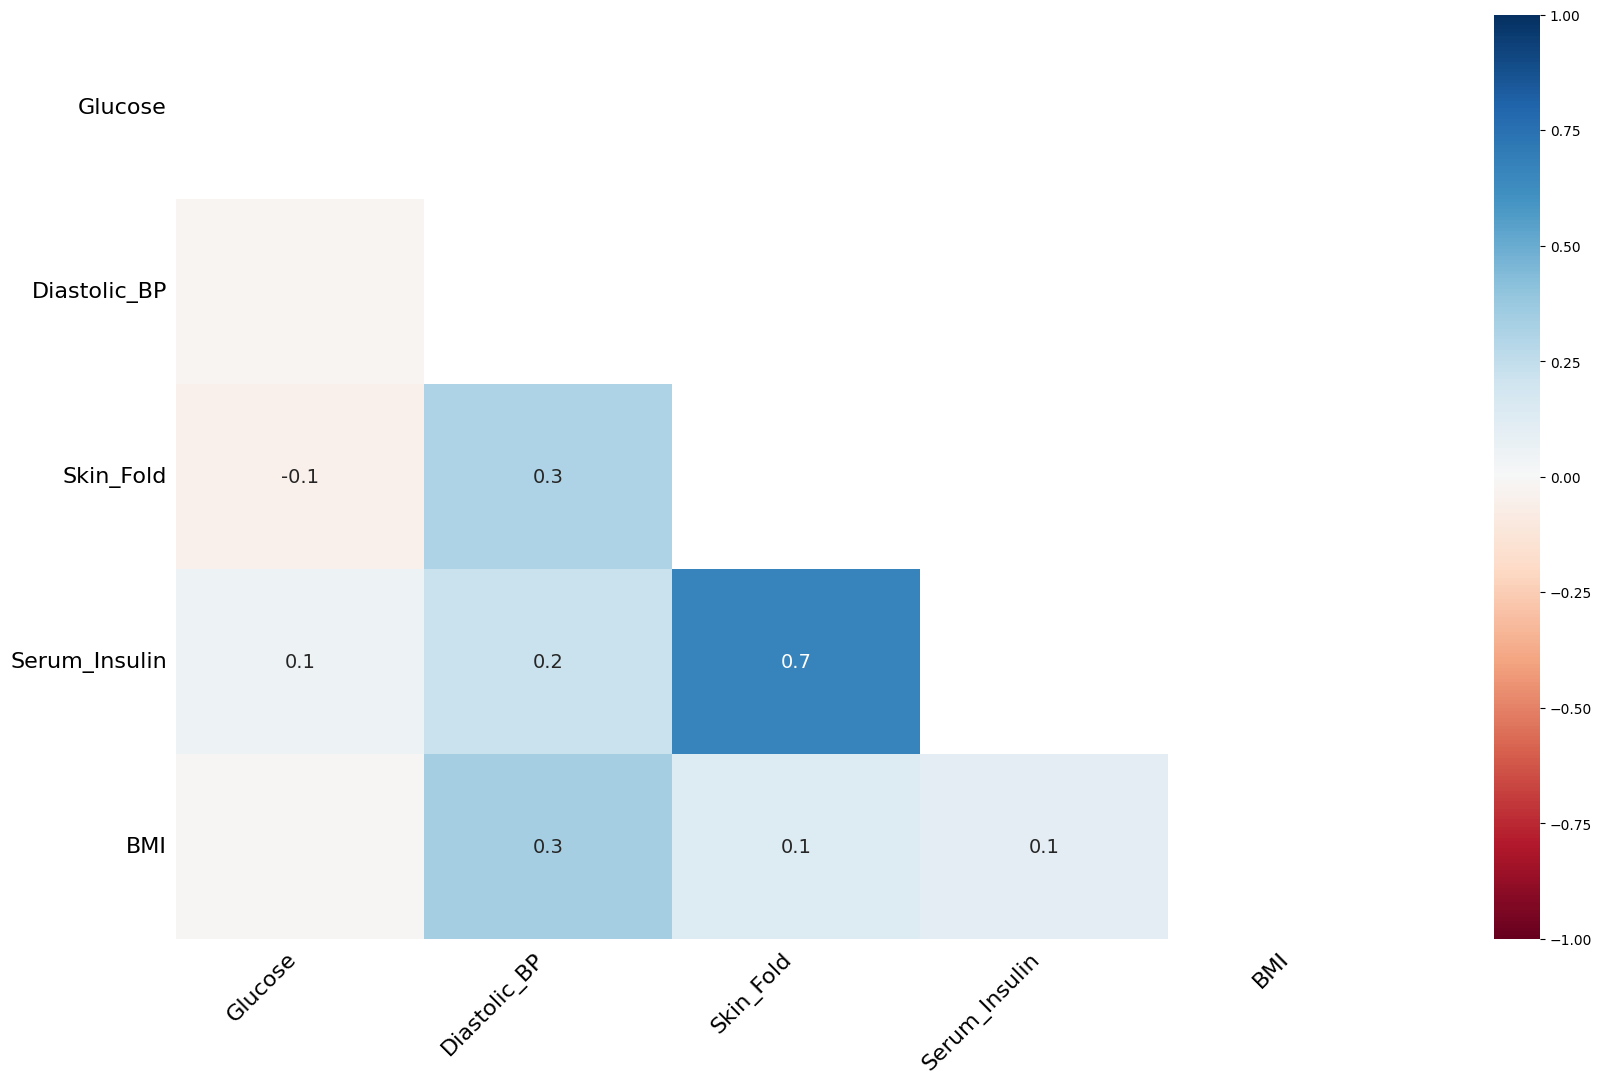

In [10]:
data = cleaner.missing_value_analysis(data)
data = cleaner.impute_missing(data)
data = cleaner.treat_outliers(data)

In [11]:
data = engineer.feature_engineering(data)
data = engineer.encode_features(data)
data = engineer.scale_features(data)

In [12]:
data.columns = data.columns.str.strip()  # remove any spaces
target_col = data.columns[-1]  # last column assumed to be target
print(f"Detected target column: {target_col}")

Detected target column: GlucoseCategory


In [13]:
X = data.drop(target_col, axis=1)
y = data[target_col]

In [14]:
if y.dtype != int:
    y = y.astype(int)
print(y.dtype, y.unique())

int64 [1 0]


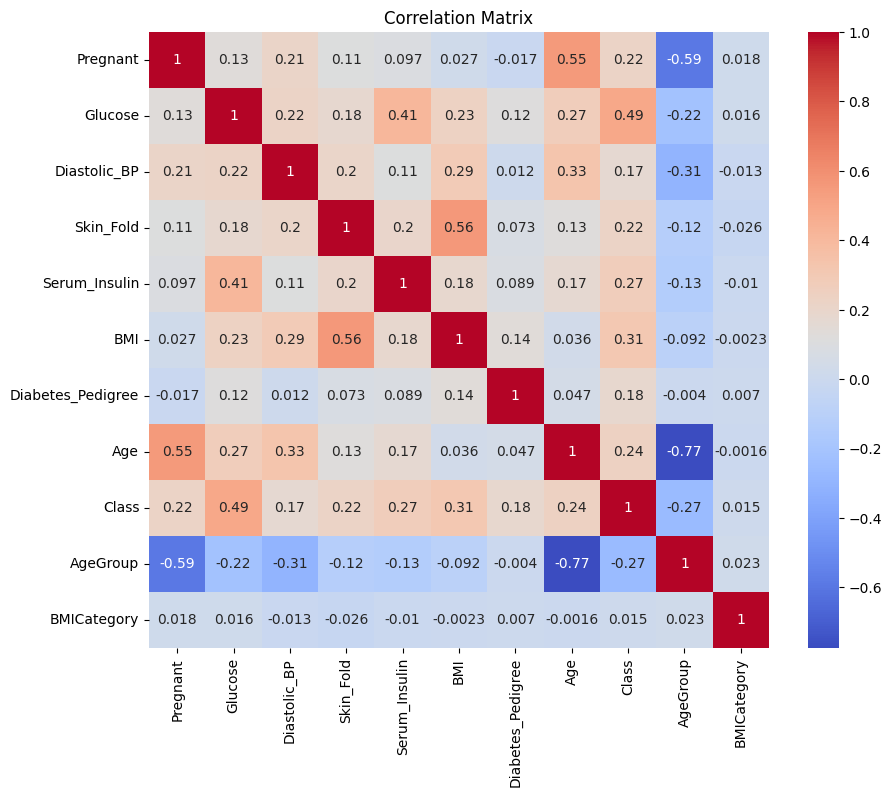

Top 5 features: ['Glucose', 'Diastolic_BP', 'Serum_Insulin', 'Age', 'Class']


In [15]:
selector.correlation_matrix(X)
top_features = selector.select_k_best_features(X, y, k=5)
X_selected = X[top_features]

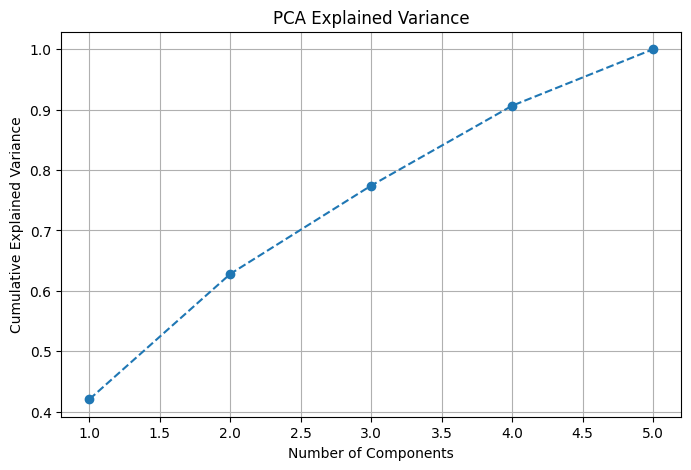

Explained variance: [0.42066226 0.20749654 0.14623213 0.13211705 0.09349202]


In [16]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_selected)
X_pca, var, cum_var = selector.perform_pca(X_scaled)

Class distribution:
 GlucoseCategory
0    571
1    197
Name: count, dtype: int64
Imbalance ratio: 0.35


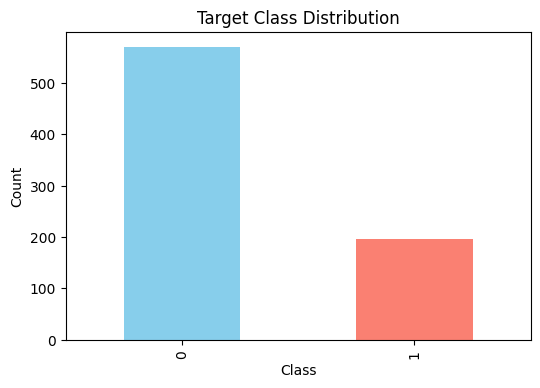

After balancing:
 GlucoseCategory
1    571
0    571
Name: count, dtype: int64


In [17]:
balancer.analyze_class_distribution(y)
X_bal, y_bal = balancer.balance_data(X, y)

In [18]:
path = os.path.abspath(r"D:\Desktop\processing")  # or any folder to save
save_data(data, os.path.join(path, "cleaned_balanced_data.csv"))

✅ Cleaned data successfully saved to 'D:\Desktop\processing\cleaned_balanced_data.csv'
